In [1]:
import pandas as pd
from collections import Counter
import re

In [2]:
with open("test.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [3]:
processed_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

In [4]:
words = processed_text.split()

In [5]:
word_counts = Counter(words)

In [6]:
df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

In [7]:
df.to_csv('word_counts.csv', index=False)

print("Word counts saved to word_counts.csv")

Word counts saved to word_counts.csv


Removing the Stop Words

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter

C:\Users\R_ohi\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R_ohi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('word_counts.csv')

stop_words = set(stopwords.words('english'))
df = df[~df['Word'].isin(stop_words)]


In [5]:
df.to_csv('word_counts_no_stopwords.csv', index=False)

Visualization on Word_Counts

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\R_ohi\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
df = pd.read_csv('word_counts.csv')

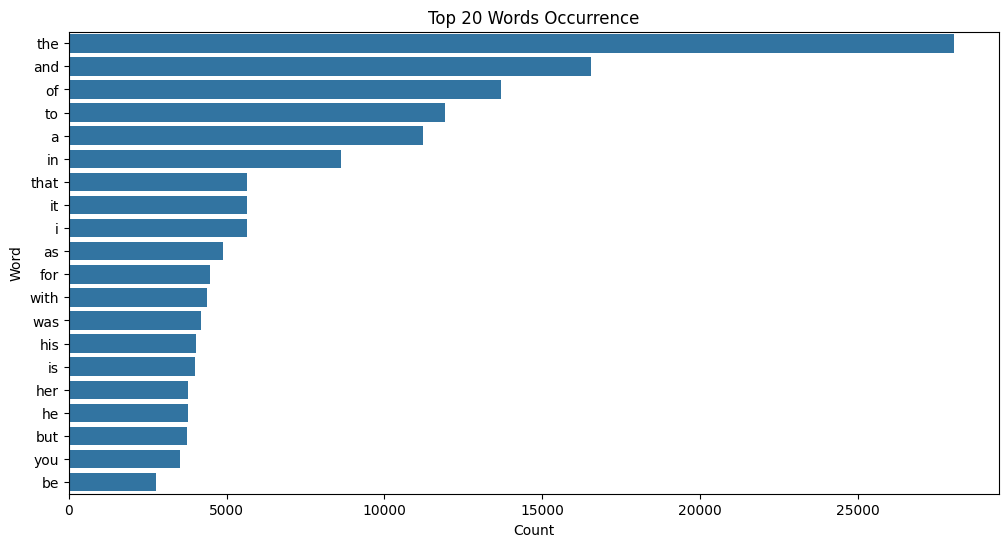

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df.nlargest(20, 'Count'))
plt.title('Top 20 Words Occurrence')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

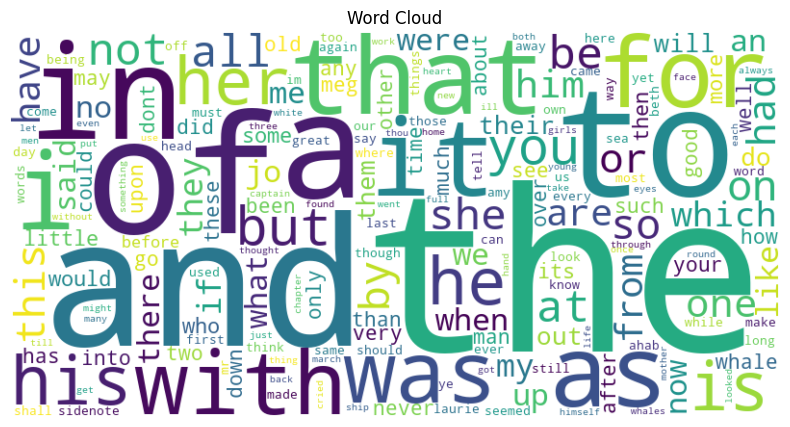

In [11]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df.set_index('Word')['Count'].to_dict())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

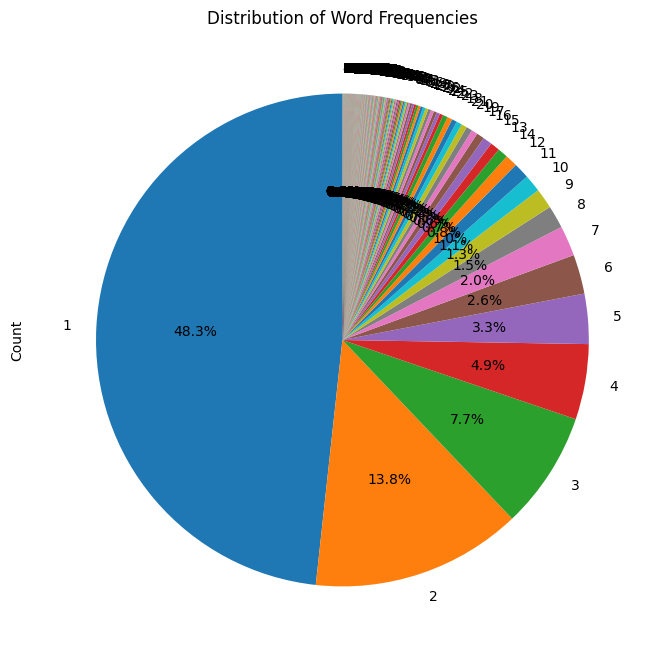

In [12]:
plt.figure(figsize=(8, 8))
df['Count'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Word Frequencies')
plt.show()

Visualization after removing Stop Words

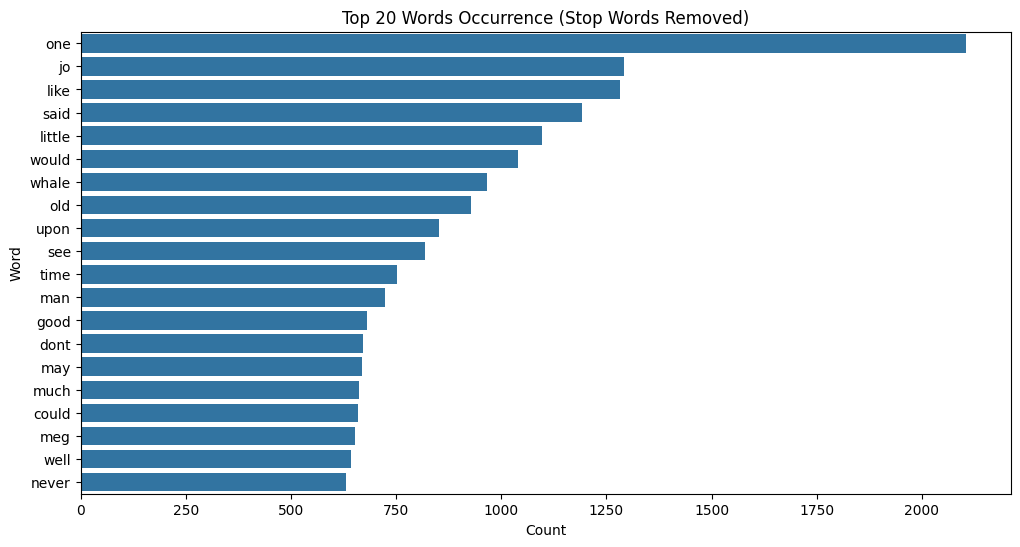

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df.nlargest(20, 'Count'))
plt.title('Top 20 Words Occurrence (Stop Words Removed)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

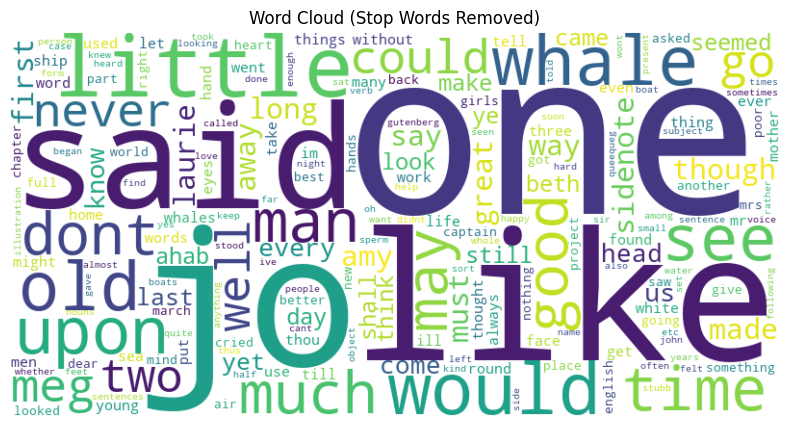

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df.set_index('Word')['Count'].to_dict())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Stop Words Removed)')
plt.show()


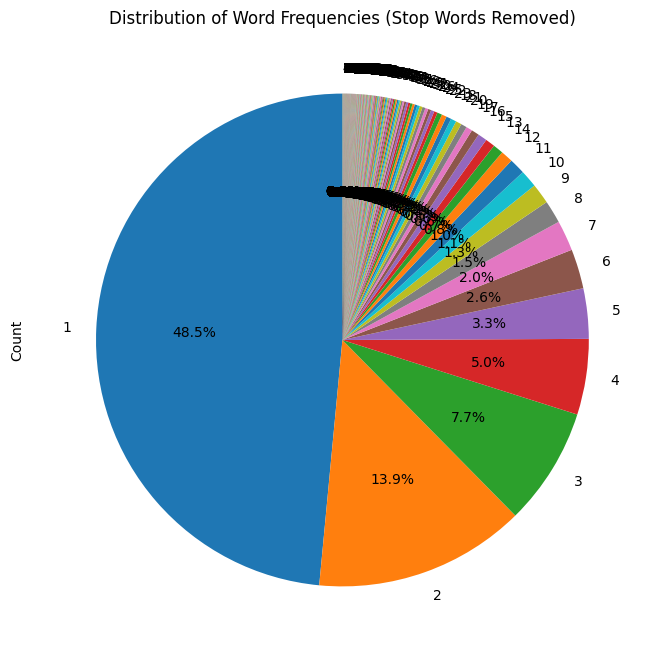

In [8]:
plt.figure(figsize=(8, 8))
df['Count'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Word Frequencies (Stop Words Removed)')
plt.show()